Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
Cleanuping...
Cleanup hooks done.
Cleanup done.


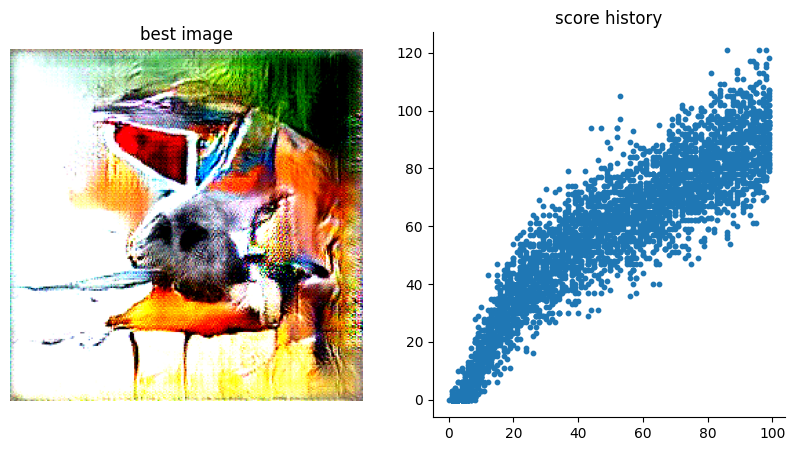

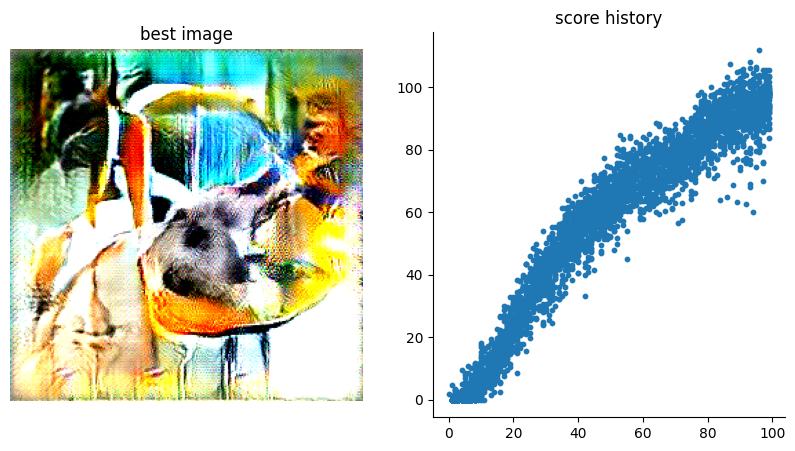

In [58]:
import os
import sys
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
import torch
import numpy as np
from core.utils.CNN_scorers import TorchScorer
from core.utils.Optimizers import CholeskyCMAES
from core.utils.GAN_utils import upconvGAN
from core.utils.layer_hook_utils import get_module_names
import matplotlib.pylab as plt
from inSilico_experiments.utils.func_lib import *

scorer = TorchScorer("alexnet", imgpix=224)
h = scorer.set_unit("score", ".features.Conv2d10", (128,7,7), ingraph=False)
G = upconvGAN("fc6").cuda().eval()
steps = 100


# do the evolotion but this time add poiss noise to the scores
new_codes = np.random.randn(1, 4096)
optimizer = CholeskyCMAES(space_dimen=4096, init_code=new_codes, init_sigma=3.0,)
score_list_noise = []
gen_ids_list_noise = []
for i in range(steps):
    latent_code = torch.from_numpy(np.array(new_codes)).float()
    imgs = G.visualize(latent_code.cuda()).cpu()
    scores = scorer.score_tsr(imgs)
    # add poisson noise to the scores
    scores_noise = np.random.poisson(scores)
    new_codes = optimizer.step_simple(scores, new_codes, )
    # let save the scores and the cropped generation ids (i) for all the scores in each step
    score_list_noise.append(scores_noise)
    gen_ids_list_noise.append(np.ones_like(scores_noise) * i)
    
#concat the scores and the gen_ids
score_list_noise = np.concatenate(score_list_noise)
gen_ids_list_noise = np.concatenate(gen_ids_list_noise)

# plot image with highest score and score history in each step in a subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(ToPILImage()(imgs[np.argmax(scores)]))
ax[0].axis("off")
ax[0].set_title("best image")
ax[1].scatter(gen_ids_list_noise, score_list_noise, s=10)
ax[1].set_title("score history")


new_codes = np.random.randn(1, 4096)
optimizer = CholeskyCMAES(space_dimen=4096, init_code=new_codes, init_sigma=3.0,)
score_list = []
gen_ids_list = []
for i in range(steps):
    latent_code = torch.from_numpy(np.array(new_codes)).float()
    imgs = G.visualize(latent_code.cuda()).cpu()
    scores = scorer.score_tsr(imgs)
    new_codes = optimizer.step_simple(scores, new_codes, )
    # let save the scores and the cropped generation ids (i) for all the scores in each step
    score_list.append(scores)
    gen_ids_list.append(np.ones_like(scores) * i)
    
#concat the scores and the gen_ids
score_list = np.concatenate(score_list)
gen_ids_list = np.concatenate(gen_ids_list)
# plot image with highest score and score history in each step in a subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(ToPILImage()(imgs[np.argmax(scores)]))
ax[0].axis("off")
ax[0].set_title("best image")
ax[1].scatter(gen_ids_list, score_list, s=10)
ax[1].set_title("score history")

scorer.cleanup()

In [13]:
scores = scorer.score_tsr(imgs)
# add poisson noise to the scores
scores_NOISE = np.random.poisson(scores)


In [53]:
scores_NOISE = np.random.poisson([40, 30] )
scores_NOISE

array([43, 23])

51